In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df=pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 75356 entries, 0 to 75355
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    75356 non-null  int64  
 1   V1      75356 non-null  float64
 2   V2      75356 non-null  float64
 3   V3      75356 non-null  float64
 4   V4      75356 non-null  float64
 5   V5      75356 non-null  float64
 6   V6      75356 non-null  float64
 7   V7      75356 non-null  float64
 8   V8      75356 non-null  float64
 9   V9      75356 non-null  float64
 10  V10     75356 non-null  float64
 11  V11     75356 non-null  float64
 12  V12     75356 non-null  float64
 13  V13     75356 non-null  float64
 14  V14     75356 non-null  float64
 15  V15     75356 non-null  float64
 16  V16     75356 non-null  float64
 17  V17     75356 non-null  float64
 18  V18     75356 non-null  float64
 19  V19     75356 non-null  float64
 20  V20     75356 non-null  float64
 21  V21     75356 non-null  float64
 22  V22

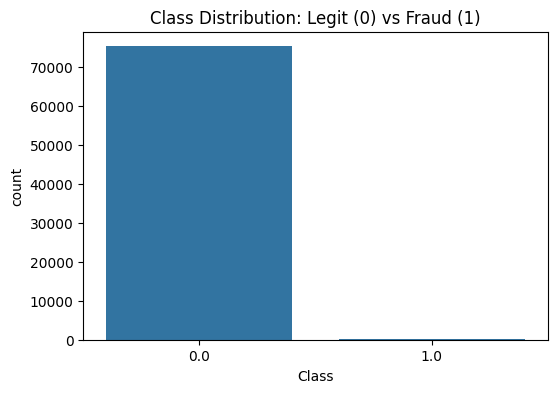

In [ ]:
print(df.info())
print(df.isnull().sum())
df.dropna(inplace=True)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Legit (0) vs Fraud (1)')
plt.show()

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9996019108280255
Confusion Matrix:
 [[15038     1]
 [    5    28]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15039
         1.0       0.97      0.85      0.90        33

    accuracy                           1.00     15072
   macro avg       0.98      0.92      0.95     15072
weighted avg       1.00      1.00      1.00     15072



In [ ]:
example = X_test.iloc[0].values.reshape(1, -1)
example_prediction = model.predict(example)
print("Example Prediction (0 = Legit, 1 = Fraud):", example_prediction[0])

Example Prediction (0 = Legit, 1 = Fraud): 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("\nEnter custom transaction details for prediction:") # user input checking
custom_input = [float(input(f"{col}: ")) for col in X.columns]
custom_example = np.array(custom_input).reshape(1, -1)
custom_prediction = model.predict(custom_example)
print("Custom Transaction Prediction (0 = Legit, 1 = Fraud):", custom_prediction[0])


Enter custom transaction details for prediction:
Time: 1000
V1: -1.5
V2: 2.3
V3: 0.5
V4: -0.2
V5: 1.1
V6: -0.8
V7: 0.4
V8: -1.7
V9: 2.5
V10: -0.9
V11: 1.4
V12: 0.3
V13: -1.1
V14: 0.3
V15: -0.6
V16: 1.0
V17: 0.8
V18: -2.0
V19: 0.7
V20: -0.3
V21: 1.2
V22: -1.0
V23: 0.9
V24: -0.5
V25: 1.3
V26: -0.7
V27: 0.2
V28: -1.2
Amount: 1500
Custom Transaction Prediction (0 = Legit, 1 = Fraud): 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
